In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "fake_job_postings.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [123]:
print(df.head())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [124]:
# Check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]

In [128]:
missing_values

salary_range           15012
department             11547
required_education      8105
benefits                7212
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2696
location                 346
description                1
dtype: int64

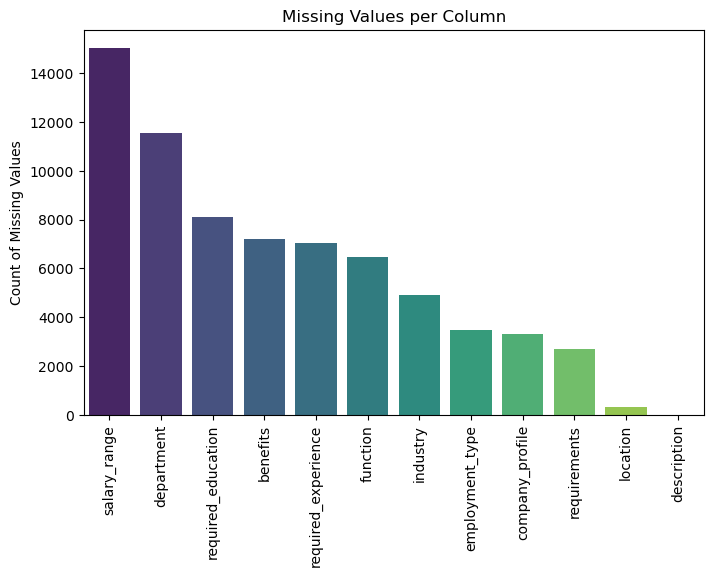

In [130]:
# Plot missing values
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Count of Missing Values")
plt.title("Missing Values per Column")
plt.show()


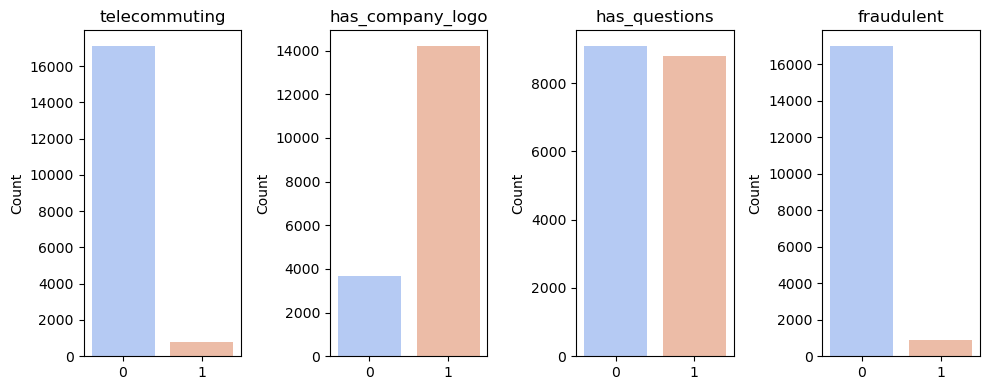

In [132]:

# Plot distribution of key binary categorical features
binary_columns = ["telecommuting", "has_company_logo", "has_questions", "fraudulent"]

plt.figure(figsize=(10, 4))
for i, col in enumerate(binary_columns, 1):
    plt.subplot(1, 4, i)
    sns.countplot(x=df[col], palette="coolwarm")
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [133]:
df_cleaned = df.drop_duplicates()
df_cleaned = df_cleaned.dropna(subset=['description'])


In [134]:



df_cleaned = df_cleaned.dropna(subset=['description'])

In [138]:
# Fill other categorical columns with 'Unknown'
columns_to_fill = [
    'salary_range', 'department', 'required_education', 'benefits',
    'required_experience', 'function', 'industry', 'employment_type',
    'company_profile', 'requirements', 'location'
]
df_cleaned[columns_to_fill] = df_cleaned[columns_to_fill].fillna('Unknown')

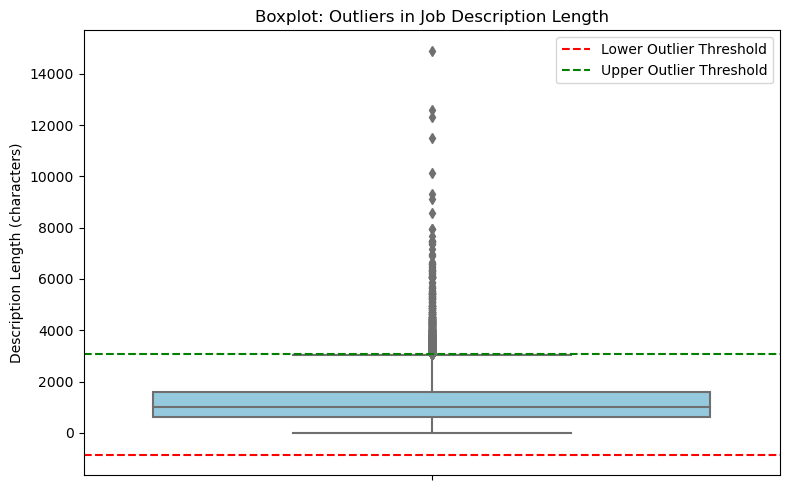

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1 (Fix): Drop rows where description is missing
df_cleaned = df_cleaned.dropna(subset=['description'])

# Step 2: Create the 'description_length' column
df_cleaned['description_length'] = df_cleaned['description'].apply(len)


# Step 1: Create the 'description_length' column if not already present
df_cleaned['description_length'] = df_cleaned['description'].apply(len)

# Step 2: Calculate IQR for description_length
Q1 = df_cleaned['description_length'].quantile(0.25)
Q3 = df_cleaned['description_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Plot the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_cleaned['description_length'], color='skyblue')
plt.axhline(lower_bound, color='red', linestyle='--', label='Lower Outlier Threshold')
plt.axhline(upper_bound, color='green', linestyle='--', label='Upper Outlier Threshold')
plt.title("Boxplot: Outliers in Job Description Length")
plt.ylabel("Description Length (characters)")
plt.legend()
plt.tight_layout()
plt.show()


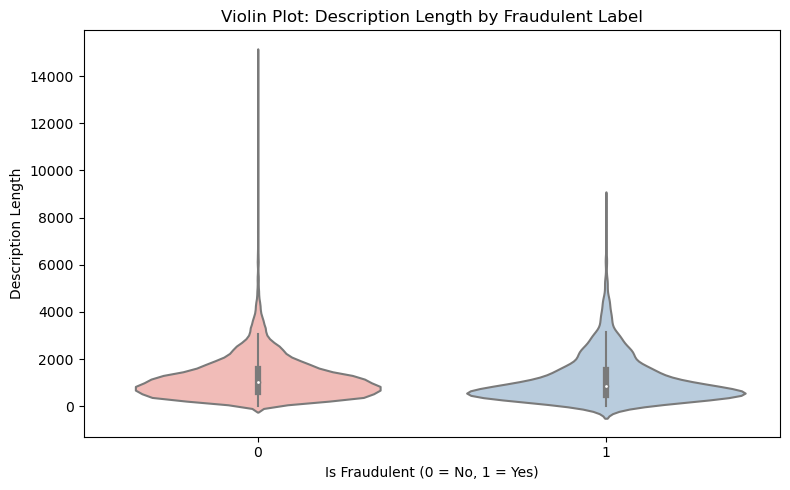

In [174]:

plt.figure(figsize=(8, 5))
sns.violinplot(x='fraudulent', y='description_length', data=df_cleaned, palette='Pastel1', inner='box')
plt.title("Violin Plot: Description Length by Fraudulent Label")
plt.xlabel("Is Fraudulent (0 = No, 1 = Yes)")
plt.ylabel("Description Length")
plt.tight_layout()
plt.show()


In [176]:
outliers = df_cleaned[df_cleaned['description_length'] > 10000]
print(outliers[['description_length', 'fraudulent', 'title']])


       description_length  fraudulent                               title
4778                14907           0  Drinking Water/Wastewater Operator
8719                12302           0       Dialysis Equipment Technician
12746               12604           0           Operating Room Technician
13197               11515           0                    Patient Advocate
14200               10124           0         Cardiovascular Technologist


In [178]:
# Remove outliers using IQR method
Q1 = df_cleaned['description_length'].quantile(0.25)
Q3 = df_cleaned['description_length'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_no_outliers = df_cleaned[(df_cleaned['description_length'] >= lower) & 
                            (df_cleaned['description_length'] <= upper)]


C:\Users\pooja\AppData\Local\Temp\ipykernel_3960\3618561724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Outlier_Removed'] = 'After'


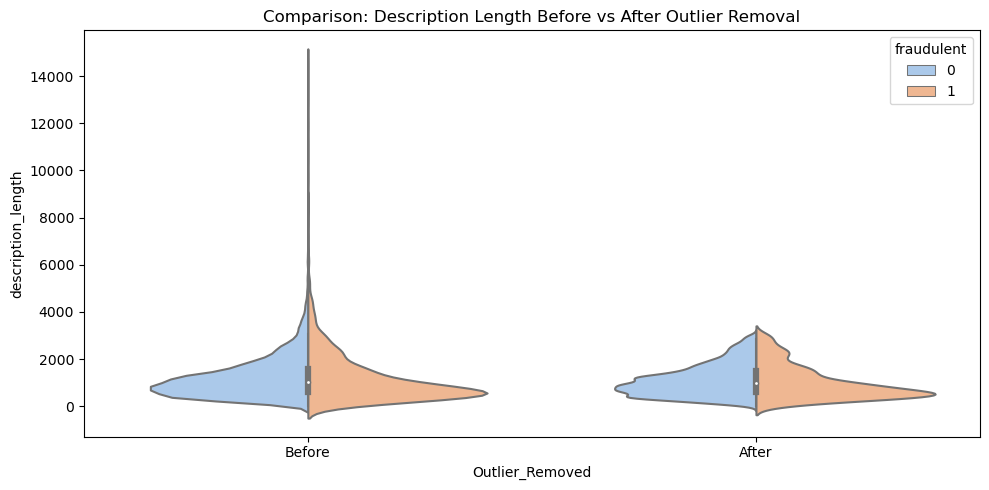

In [180]:
df_cleaned['Outlier_Removed'] = 'Before'
df_no_outliers['Outlier_Removed'] = 'After'

df_compare = pd.concat([df_cleaned[['description_length', 'fraudulent', 'Outlier_Removed']],
                        df_no_outliers[['description_length', 'fraudulent', 'Outlier_Removed']]])

plt.figure(figsize=(10, 5))
sns.violinplot(x='Outlier_Removed', y='description_length', hue='fraudulent', data=df_compare,
               palette='pastel', split=True, inner='box')
plt.title("Comparison: Description Length Before vs After Outlier Removal")
plt.tight_layout()
plt.show()


In [192]:
function_counts = df_cleaned['function'].value_counts()
print(function_counts)


function
Information Technology    474
Sales                     424
Engineering               296
Customer Service          243
Marketing                 183
Administrative            155
Other                      78
Management                 72
Accounting/Auditing        65
Design                     64
Project Management         54
Business Development       52
Finance                    44
Human Resources            42
Advertising                30
Writing/Editing            27
Health Care Provider       27
Quality Assurance          26
Education                  25
Data Analyst               24
Art/Creative               22
Manufacturing              19
Production                 19
General Business           19
Consulting                 18
Product Management         18
Business Analyst           14
Training                   13
Strategy/Planning          11
Financial Analyst          11
Public Relations           10
Supply Chain                8
Research                    5
D

In [198]:

threshold = 40

# Find rare functions
rare_functions = function_counts[function_counts < threshold].index.tolist()

# Create an anomaly flag column
df_cleaned['function_anomaly'] = df_cleaned['function'].isin(rare_functions)


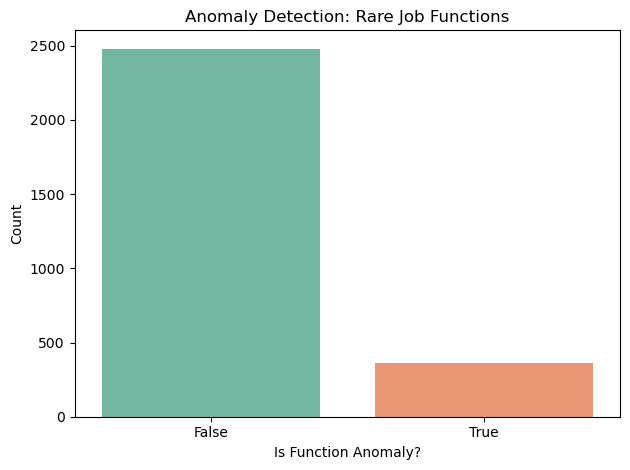

In [200]:
sns.countplot(x='function_anomaly', data=df_cleaned, palette='Set2')
plt.title("Anomaly Detection: Rare Job Functions")
plt.xlabel("Is Function Anomaly?")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [203]:
# Check how many of the 'Unknown' rows are fraudulent
unknown_rows = df_cleaned[df_cleaned['function'] == 'Unknown']
fraud_count = unknown_rows['fraudulent'].sum()
total_unknown = unknown_rows.shape[0]

print(f"Out of {total_unknown} 'Unknown' function rows, {fraud_count} are fraudulent.")


Out of 0 'Unknown' function rows, 0 are fraudulent.


In [205]:
# Remove rows where any column contains the string 'Unknown'
df_fully_cleaned = df_cleaned[~df_cleaned.isin(['Unknown']).any(axis=1)].copy()


In [214]:
# Step 5: Save the cleaned data to CSV
df_fully_cleaned.to_csv("job_fraud.csv", index=False)

print("✅ Cleaned dataset saved as 'job_fraud.csv'")

✅ Cleaned dataset saved as 'job_fraud.csv'


# 1. Fraudulent vs Real – Overall Distribution

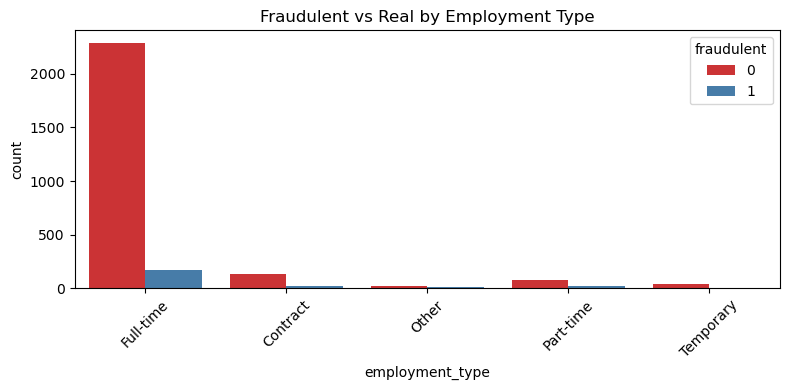

In [216]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_cleaned, x='employment_type', hue='fraudulent', palette='Set1')
plt.title("Fraudulent vs Real by Employment Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 3. Top 10 Industries – Real vs Fake Jobs

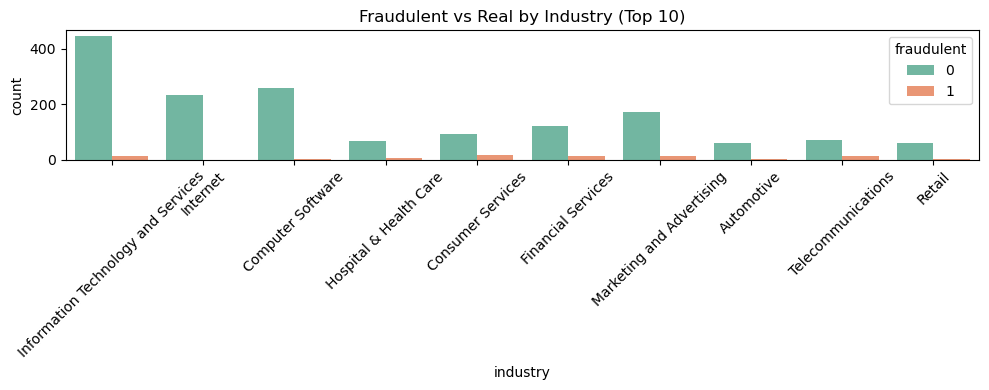

In [218]:
top_industries = df_cleaned['industry'].value_counts().head(10).index
plt.figure(figsize=(10, 4))
sns.countplot(data=df_cleaned[df_cleaned['industry'].isin(top_industries)],
              x='industry', hue='fraudulent', palette='Set2')
plt.title("Fraudulent vs Real by Industry (Top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 4. Fraud by Required Experience

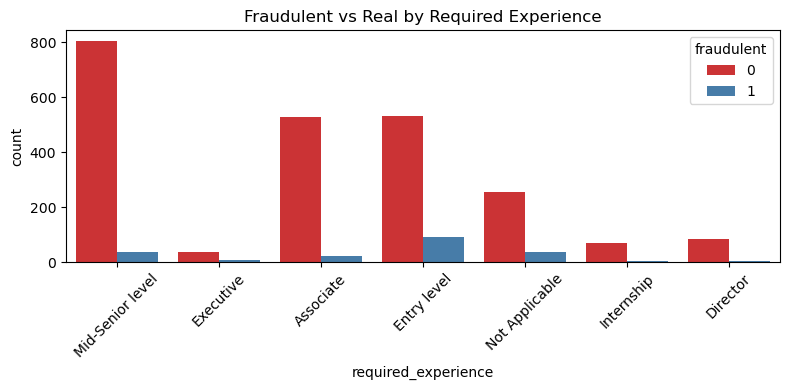

In [221]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_cleaned, x='required_experience', hue='fraudulent', palette='Set1')
plt.title("Fraudulent vs Real by Required Experience")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 5. Correlation of Numeric variable

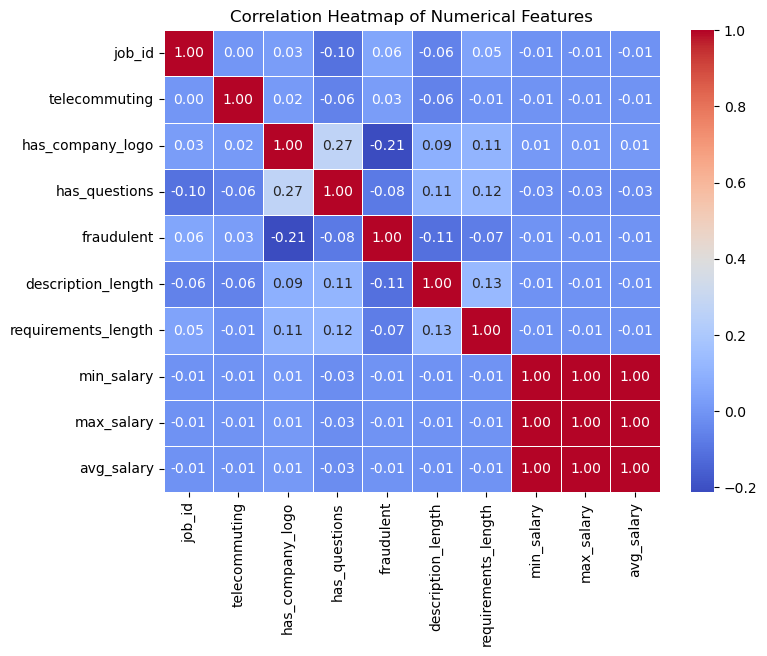

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select only numeric columns
numeric_cols = df_cleaned.select_dtypes(include='number')
# Compute correlation matrix
correlation_matrix = numeric_cols.corr()
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# 6.Heatmap of Top Industry vs Employment Type

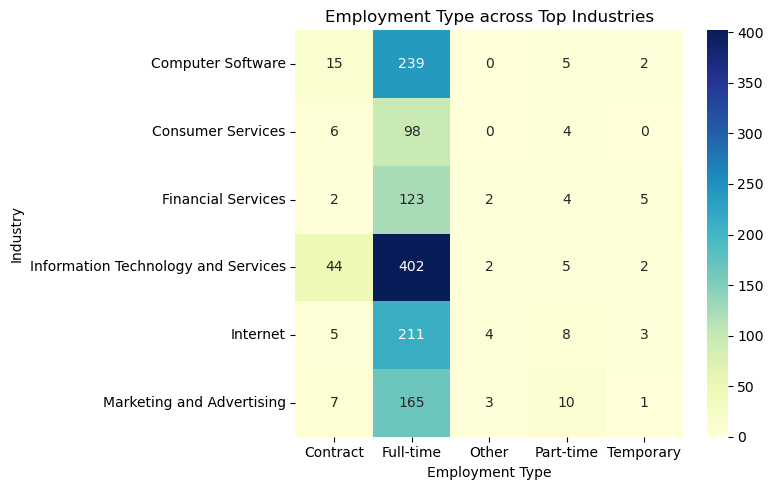

In [227]:
# Cross-tab heatmap: Top industries vs employment type
top_ind = df_cleaned['industry'].value_counts().head(6).index
df_heatmap = df_cleaned[df_cleaned['industry'].isin(top_ind)]

heat_data = pd.crosstab(df_heatmap['industry'], df_heatmap['employment_type'])

plt.figure(figsize=(8, 5))
sns.heatmap(heat_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Employment Type across Top Industries")
plt.ylabel("Industry")
plt.xlabel("Employment Type")
plt.tight_layout()
plt.show()


# WordCloud – Common Words in Real Job Descriptions

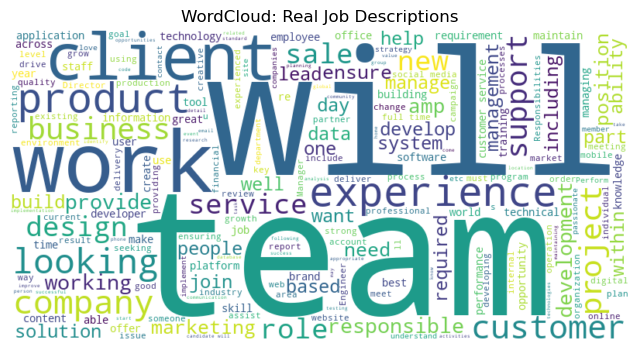

In [229]:
from wordcloud import WordCloud

real_jobs = " ".join(df_cleaned[df_cleaned['fraudulent'] == 0]['description'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(real_jobs)

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud: Real Job Descriptions")
plt.show()


# WordCloud – Common Words in Fake Job Descriptions

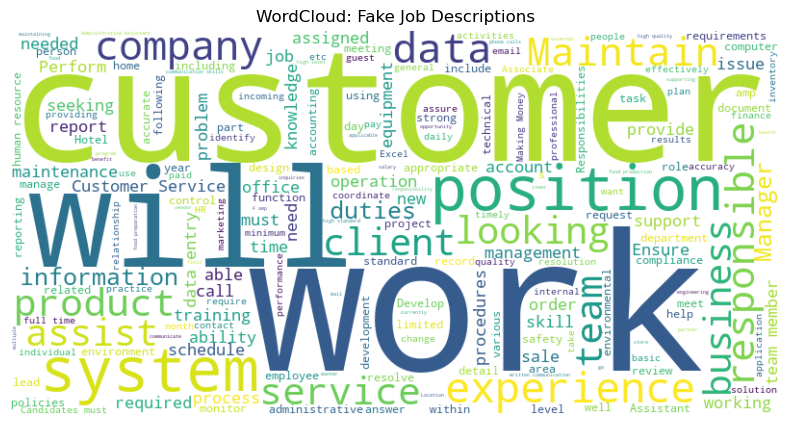

In [232]:

fake_jobs = " ".join(df_cleaned[df_cleaned['fraudulent'] == 1]['description'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_jobs)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud: Fake Job Descriptions")
plt.show()


# Pie Chart – Distribution of Real vs Fake Jobs

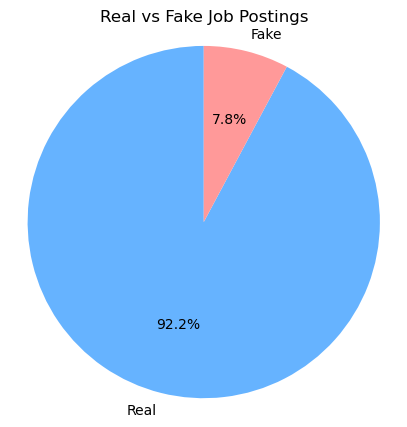

In [236]:
# Pie chart for fraud vs real jobs
labels = ['Real', 'Fake']
sizes = df_cleaned['fraudulent'].value_counts()
colors = ['#66b3ff','#ff9999']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title("Real vs Fake Job Postings")
plt.axis('equal')
plt.show()


# Predictive modelling

In [238]:
# Select relevant features
features = ['telecommuting', 'has_company_logo', 'has_questions',
            'employment_type', 'required_experience', 'required_education',
            'industry', 'function']

target = 'fraudulent'


In [239]:

from sklearn.preprocessing import LabelEncoder

# Copy dataset and drop rows with 'Unknown' for cleaner training
df_ml = df_cleaned[df_cleaned[features].ne('Unknown').all(axis=1)].copy()

# Encode categorical variables
le = LabelEncoder()
for col in features:
    df_ml[col] = le.fit_transform(df_ml[col])

# Define X and y
X = df_ml[features]
y = df_ml[target]


In [240]:
from sklearn.model_selection import train_test_split

# 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [241]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Create model with class_weight to handle imbalance
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)

# Evaluation
print("Random Forest Classification Report:\n")
print(classification_report(y_test, rf_preds))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, rf_preds))


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       791
           1       0.76      0.60      0.67        62

    accuracy                           0.96       853
   macro avg       0.86      0.79      0.82       853
weighted avg       0.95      0.96      0.95       853

Confusion Matrix:

[[779  12]
 [ 25  37]]


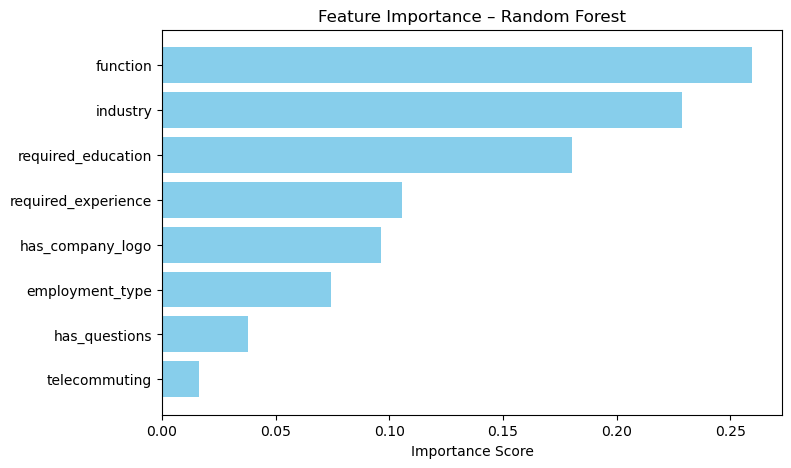

In [242]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot feature importances
importances = rf_model.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Bar plot
plt.figure(figsize=(8, 5))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='skyblue')
plt.title("Feature Importance – Random Forest")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.show()
